In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Read in data (old)  

In [3]:
# later time step
nn = 250
# step interval
dn1 = 10
dn2 = 50

filename1=('./ptcls_info_t%3.3d.dat')%(nn)
x1,y1,vx1,vy1,vz1,m1,pe1=np.loadtxt(filename1,usecols=[0,1,2,3,4,5,6],unpack=True)
filename2=('./ptcls_info_t%3.3d.dat')%(nn+dn1)
x2,y2,vx2,vy2,vz2,m2,pe2=np.loadtxt(filename2,usecols=[0,1,2,3,4,5,6],unpack=True)
filename3=('./ptcls_info_t%3.3d.dat')%(nn+dn2)
x3,y3,vx3,vy3,vz3,m3,pe3=np.loadtxt(filename3,usecols=[0,1,2,3,4,5,6],unpack=True)

omega_bar = 0.480
CR_bar = 3.2
CR_spiral = 7.0

R_max = 8.

In [4]:
r1 = [np.sqrt(x1[i]**2 + y1[i]**2) for i in range(len(x1))]
r2 = [np.sqrt(x2[i]**2 + y2[i]**2) for i in range(len(x2))]
r3 = [np.sqrt(x3[i]**2 + y3[i]**2) for i in range(len(x3))]
ang1 = [x1[i]*vy1[i]-y1[i]*vx1[i] for i in range(len(x1))]
ang2 = [x2[i]*vy2[i]-y2[i]*vx2[i] for i in range(len(x2))]
ang3 = [x3[i]*vy3[i]-y3[i]*vx3[i] for i in range(len(x3))]
da1 = [ang2[i] - ang1[i] for i in range(len(x1))]
da2 = [ang3[i] - ang1[i] for i in range(len(x1))]
Ej1 = [pe1[i]+0.5*(vx1[i]**2+vy1[i]**2+vz1[i]**2)+omega_bar*(vx1[i]*y1[i]-vy1[i]*x1[i])-0.5*omega_bar**2*r1[i]**2 for i in range(len(x1))]
Ej2 = [pe2[i]+0.5*(vx2[i]**2+vy2[i]**2+vz2[i]**2)+omega_bar*(vx2[i]*y2[i]-vy2[i]*x2[i])-0.5*omega_bar**2*r2[i]**2 for i in range(len(x2))]
Ej3 = [pe3[i]+0.5*(vx3[i]**2+vy3[i]**2+vz3[i]**2)+omega_bar*(vx3[i]*y3[i]-vy3[i]*x3[i])-0.5*omega_bar**2*r3[i]**2 for i in range(len(x3))]
dEj1 = [Ej2[i] - Ej1[i] for i in range(len(x1))]
dEj2 = [Ej3[i] - Ej1[i] for i in range(len(x2))]

1.change of the Jacobi Energy
----

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


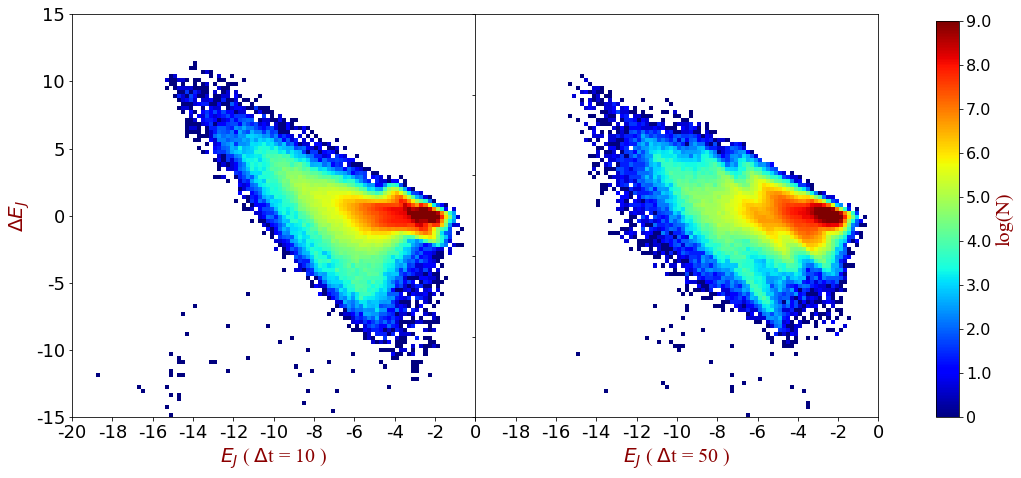

In [5]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax1 = fig.add_axes([0.1, 0.1, 0.35, 0.8])
ax2 = fig.add_axes([0.45, 0.1, 0.35, 0.8])
ax1.tick_params(direction='out',labelsize=18)
ax2.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
norm= matplotlib.colors.Normalize(vmin=0,vmax=9.)

#PLOT 1
H1,xedges1,yedges1 = np.histogram2d(dEj1,Ej1,bins=(100,100),range=([-15.0, 15.0],[-20.0,0]))

gci=ax1.imshow(np.log(H1),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax.set_xlabel('X')
ax1.set_xticks(np.linspace(0,1,11))
ax1.set_xticklabels( ('-20', '-18', '-16', '-14', '-12', '-10', '-8', '-6', '-4', '-2', '0'))
#ax.set_ylabel('Y')
ax1.set_yticks(np.linspace(0,1,7))
ax1.set_yticklabels(('-15', '-10', '-5', '0', '5', '10', '15'))

#set labels
ax1.set_xlabel('$E_{J}$ ( $\Delta$t = 10 )',fontdict=font)
ax1.set_ylabel('$\Delta E_{J}$',fontdict=font)

#PLOT 2
H2,xedges2,yedges2 = np.histogram2d(dEj2,Ej1,bins=(100,100),range=([-15.0, 15.0],[-20.0,0]))

ax2.imshow(np.log(H2),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax.set_xlabel('X')
ax2.set_xticks(np.linspace(0,1,11))
ax2.set_xticklabels( ('', '-18', '-16', '-14', '-12', '-10', '-8', '-6', '-4', '-2', '0'))
ax2.set_yticklabels( (''))

#set labels
ax2.set_xlabel('$E_{J}$ ( $\Delta$t = 50 )',fontdict=font)
ax2.set_ylabel('')

#colorbar
cbar_ax = fig.add_axes([0.85, 0.22, 0.02, 0.55])
cbar = fig.colorbar(gci, cax=cbar_ax)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,9,10))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'))
cbar.ax.tick_params(labelsize=16)
#plt.clim(0,8)

#title
#titleStr='Change of $E_{J}$ from T = '+str(nn-dn)+' to '+str(nn)
#plt.title(titleStr,fontdict=font)

#savefig
figname1='./output/dEj_t'+str(nn)+'_cmp.png'
plt.savefig(figname1)

2.change of angular momentum
----

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


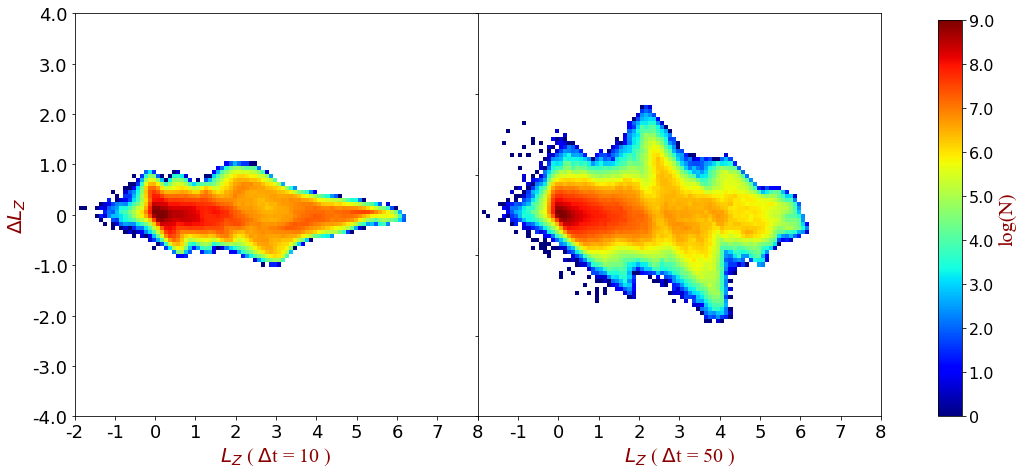

In [6]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax1 = fig.add_axes([0.1, 0.1, 0.35, 0.8])
ax2 = fig.add_axes([0.45, 0.1, 0.35, 0.8])
ax1.tick_params(direction='out',labelsize=18)
ax2.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
norm= matplotlib.colors.Normalize(vmin=0,vmax=9.)

#PLOT 1
H1,xedges1,yedges1 = np.histogram2d(da1,ang1,bins=(100,100),range=([-4.,4.],[-2.,8.]))

gci=ax1.imshow(np.log(H1),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax.set_xlabel('X')
ax1.set_xticks(np.linspace(0,1,11))
ax1.set_xticklabels( ('-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8'))
#ax1.set_ylabel('Y')
ax1.set_yticks(np.linspace(0,1,9))
ax1.set_yticklabels( ('-4.0', '-3.0', '-2.0', '-1.0', '0', '1.0', '2.0', '3.0', '4.0'))

#set labels
ax1.set_xlabel('$L_{Z}$ ( $\Delta$t = 10 )',fontdict=font)
ax1.set_ylabel('$\Delta L_{Z}$',fontdict=font)

#PLOT 2
H2,xedges2,yedges2 = np.histogram2d(da2,ang1,bins=(100,100),range=([-4.,4.],[-2,8]))

ax2.imshow(np.log(H2),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax.set_xlabel('X')
ax2.set_xticks(np.linspace(0,1,11))
ax2.set_xticklabels( ('', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8'))
ax2.set_yticklabels( (''))

#set labels
ax2.set_xlabel('$L_{Z}$ ( $\Delta$t = 50 )',fontdict=font)
ax2.set_ylabel('')

#colorbar
cbar_ax = fig.add_axes([0.85, 0.22, 0.02, 0.55])
cbar = fig.colorbar(gci, cax=cbar_ax)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,9,10))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'))
cbar.ax.tick_params(labelsize=16)
#plt.clim(0,8)

#savefig
figname2='./output/da_t'+str(nn)+'_cmp.png'
plt.savefig(figname2)

### 3.Density Map (by Jacobi energy $E_{J}$)
-----
<ol type="a">
    <li> -2.0 < Ej < 0 </li>
    <li> -4.0 < Ej < -2.0 </li>
    <li> -6.0 < Ej < -4.0 </li>
    <li> -10.0 < Ej < -6.0 </li>
    <li> -14.0 < Ej < -10.0 </li>
    <li> -18.0 < Ej < -14.0 </li>
</ol> 

In [7]:
Ej = np.asarray(Ej1)
Exa = x1[np.abs(Ej + 1.0) < 1.0]
Eya = y1[np.abs(Ej + 1.0) < 1.0]
Exb = x1[np.abs(Ej + 3.0) < 1.0]
Eyb = y1[np.abs(Ej + 3.0) < 1.0]
Exc = x1[np.abs(Ej + 5.0) < 1.0]
Eyc = y1[np.abs(Ej + 5.0) < 1.0]
Exd = x1[np.abs(Ej + 8.0) < 2.0]
Eyd = y1[np.abs(Ej + 8.0) < 2.0]
Exe = x1[np.abs(Ej + 12.0) < 2.0]
Eye = y1[np.abs(Ej + 12.0) < 2.0]
Exf = x1[np.abs(Ej + 16.0) < 2.0]
Eyf = y1[np.abs(Ej + 16.0) < 2.0]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: RuntimeWarning: divide by zero encountered in log


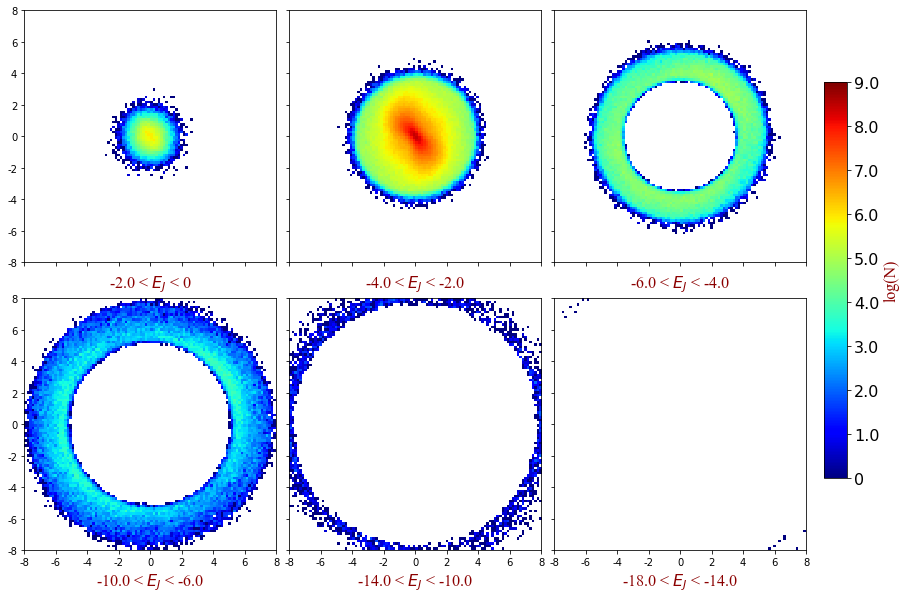

In [8]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax1 = fig.add_axes([0.1, 0.5, 0.23, 0.35])
ax2 = fig.add_axes([0.33, 0.5, 0.23, 0.35])
ax3 = fig.add_axes([0.56, 0.5, 0.23, 0.35])
ax4 = fig.add_axes([0.1, 0.1, 0.23, 0.35])
ax5 = fig.add_axes([0.33, 0.1, 0.23, 0.35])
ax6 = fig.add_axes([0.56, 0.1, 0.23, 0.35])

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 16,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
norm= matplotlib.colors.Normalize(vmin=0,vmax=9.)

#PLOT 1
H1,xedges1,yedges1 = np.histogram2d(Eya,Exa,bins=(100,100),range=([-8.,8.],[-8.,8.]))

gci=ax1.imshow(np.log(H1),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#ax1.add_patch(plt.Circle((0,0),CR_bar,color='black'))

#set ticks
#ax1.set_xlabel('X')
ax1.set_xticks(np.linspace(0,1,9))
ax1.set_xticklabels( (''))
#ax1.set_ylabel('Y')
ax1.set_yticks(np.linspace(0,1,9))
ax1.set_yticklabels(('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))

#set labels
ax1.set_xlabel('-2.0 < $E_{J}$ < 0',fontdict=font)
#ax1.set_ylabel('Y',fontdict=font)

########################

#PLOT 2
H2,xedges2,yedges2 = np.histogram2d(Eyb,Exb,bins=(100,100),range=([-8.,8.],[-8.,8.]))

ax2.imshow(np.log(H2),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax2.set_xlabel('X')
ax2.set_xticks(np.linspace(0,1,9))
ax2.set_xticklabels( (''))
#ax2.set_ylabel('Y')
ax2.set_yticks(np.linspace(0,1,9))
ax2.set_yticklabels((''))

#set labels
ax2.set_xlabel('-4.0 < $E_{J}$ < -2.0',fontdict=font)
#ax2.set_ylabel('')

########################

#PLOT 3
H3,xedges3,yedges3 = np.histogram2d(Eyc,Exc,bins=(100,100),range=([-8.,8.],[-8.,8.]))

ax3.imshow(np.log(H3),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax3.set_xlabel('X')
ax3.set_xticks(np.linspace(0,1,9))
ax3.set_xticklabels( (''))
#ax3.set_ylabel('Y')
ax3.set_yticks(np.linspace(0,1,9))
ax3.set_yticklabels((''))

#set labels
ax3.set_xlabel('-6.0 < $E_{J}$ < -4.0',fontdict=font)
#ax3.set_ylabel('')

########################

#PLOT 4
H4,xedges4,yedges4 = np.histogram2d(Eyd,Exd,bins=(100,100),range=([-8.,8.],[-8.,8.]))

ax4.imshow(np.log(H4),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax4.set_xlabel('X')
ax4.set_xticks(np.linspace(0,1,9))
ax4.set_xticklabels( ('-8', '-6', '-4', '-2', '0', '2',  '4',  '6', '8'))
#ax4.set_ylabel('Y')
ax4.set_yticks(np.linspace(0,1,9))
ax4.set_yticklabels(('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))

#set labels
ax4.set_xlabel('-10.0 < $E_{J}$ < -6.0',fontdict=font)

########################

#PLOT 5
H5,xedges5,yedges5 = np.histogram2d(Eye,Exe,bins=(100,100),range=([-8.,8.],[-8.,8.]))

ax5.imshow(np.log(H5),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax5.set_xlabel('X')
ax5.set_xticks(np.linspace(0,1,9))
ax5.set_xticklabels( ('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))
#ax5.set_ylabel('Y')
ax5.set_yticks(np.linspace(0,1,9))
ax5.set_yticklabels((''))

#set labels
ax5.set_xlabel('-14.0 < $E_{J}$ < -10.0',fontdict=font)

########################

#PLOT 6
H6,xedges6,yedges6 = np.histogram2d(Eyf,Exf,bins=(100,100),range=([-8.,8.],[-8.,8.]))

ax6.imshow(np.log(H6),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax6.set_xlabel('X')
ax6.set_xticks(np.linspace(0,1,9))
ax6.set_xticklabels( ('-8', '-6', '-4', '-2', '0', '2', '4', '6', '8'))
#ax6.set_ylabel('Y')
ax6.set_yticks(np.linspace(0,1,9))
ax6.set_yticklabels((''))

#set labels
ax6.set_xlabel('-18.0 < $E_{J}$ < -14.0',fontdict=font)
#ax6.set_ylabel('')

#colorbar
cbar_ax = fig.add_axes([0.8, 0.20, 0.02, 0.55])
cbar = fig.colorbar(gci, cax=cbar_ax)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,9,10))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'))
cbar.ax.tick_params(labelsize=16)
#plt.clim(0,8)

#savefig
figname3='./output/Ej_dens_t'+str(nn)+'_cmp.png'
plt.savefig(figname3)

### 4.Density Map (by angular momentum $L_{z}$)
-----
<ol type="a">
    <li> -1. < Lz < 0.</li>
    <li> 0 < Lz < 1.0 </li>
    <li> 1.0 < Lz < 2.0 </li>
    <li> 2.0 < Lz < 3.0 </li>
    <li> 3.0 < Lz < 5.0 </li>
    <li> 5.0 < Lz < 7.0 </li>
</ol> 

In [9]:
aj = np.asarray(ang1)
axa = x1[np.abs(aj + 0.5) < 0.5]
aya = y1[np.abs(aj + 0.5) < 0.5]
axb = x1[np.abs(aj - 0.5) < 0.5]
ayb = y1[np.abs(aj - 0.5) < 0.5]
axc = x1[np.abs(aj - 1.5) < 0.5]
ayc = y1[np.abs(aj - 1.5) < 0.5]
axd = x1[np.abs(aj - 2.5) < 0.5]
ayd = y1[np.abs(aj - 2.5) < 0.5]
axe = x1[np.abs(aj - 4.) < 1.]
aye = y1[np.abs(aj - 4.) < 1.]
axf = x1[np.abs(aj - 6.) < 1.]
ayf = y1[np.abs(aj - 6.) < 1.]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: RuntimeWarning: divide by zero encountered in log


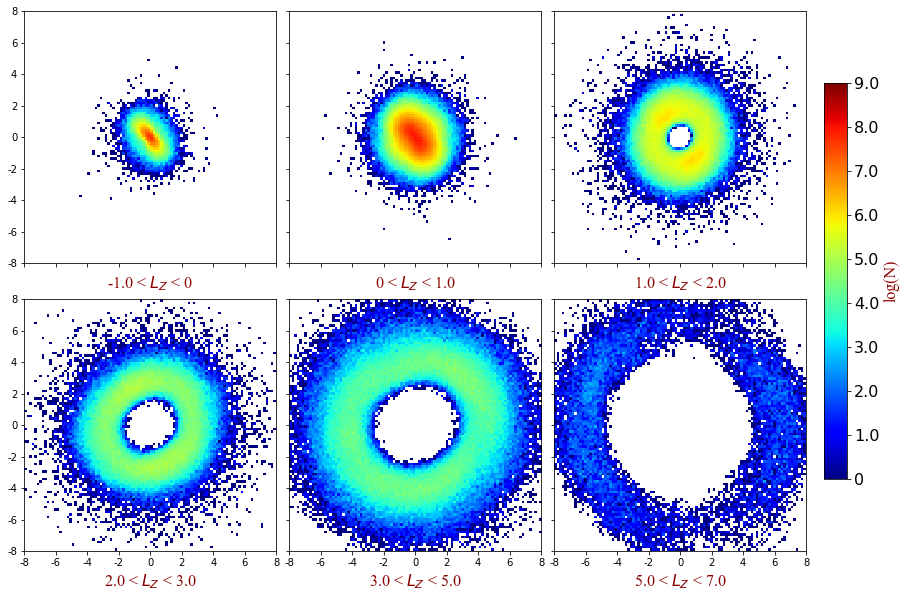

In [10]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax1 = fig.add_axes([0.1, 0.5, 0.23, 0.35])
ax2 = fig.add_axes([0.33, 0.5, 0.23, 0.35])
ax3 = fig.add_axes([0.56, 0.5, 0.23, 0.35])
ax4 = fig.add_axes([0.1, 0.1, 0.23, 0.35])
ax5 = fig.add_axes([0.33, 0.1, 0.23, 0.35])
ax6 = fig.add_axes([0.56, 0.1, 0.23, 0.35])

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 16,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
norm= matplotlib.colors.Normalize(vmin=0,vmax=9.)

#PLOT 1
H1,xedges1,yedges1 = np.histogram2d(aya,axa,bins=(100,100),range=([-8.,8.],[-8.,8.]))

gci=ax1.imshow(np.log(H1),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#ax1.add_patch(plt.Circle((0,0),CR_bar,color='black'))

#set ticks
#ax1.set_xlabel('X')
ax1.set_xticks(np.linspace(0,1,9))
ax1.set_xticklabels( (''))
#ax1.set_ylabel('Y')
ax1.set_yticks(np.linspace(0,1,9))
ax1.set_yticklabels(('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))

#set labels
ax1.set_xlabel('-1.0 < $L_{Z}$ < 0',fontdict=font)
#ax1.set_ylabel('Y',fontdict=font)

########################

#PLOT 2
H2,xedges2,yedges2 = np.histogram2d(ayb,axb,bins=(100,100),range=([-8.,8.],[-8.,8.]))

ax2.imshow(np.log(H2),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax2.set_xlabel('X')
ax2.set_xticks(np.linspace(0,1,9))
ax2.set_xticklabels( (''))
#ax2.set_ylabel('Y')
ax2.set_yticks(np.linspace(0,1,9))
ax2.set_yticklabels((''))

#set labels
ax2.set_xlabel('0 < $L_{Z}$ < 1.0',fontdict=font)
#ax2.set_ylabel('')

########################

#PLOT 3
H3,xedges3,yedges3 = np.histogram2d(ayc,axc,bins=(100,100),range=([-8.,8.],[-8.,8.]))

ax3.imshow(np.log(H3),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax3.set_xlabel('X')
ax3.set_xticks(np.linspace(0,1,9))
ax3.set_xticklabels( (''))
#ax3.set_ylabel('Y')
ax3.set_yticks(np.linspace(0,1,9))
ax3.set_yticklabels((''))

#set labels
ax3.set_xlabel('1.0 < $L_{Z}$ < 2.0',fontdict=font)
#ax3.set_ylabel('')

########################

#PLOT 4
H4,xedges4,yedges4 = np.histogram2d(ayd,axd,bins=(100,100),range=([-8.,8.],[-8.,8.]))

ax4.imshow(np.log(H4),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax4.set_xlabel('X')
ax4.set_xticks(np.linspace(0,1,9))
ax4.set_xticklabels( ('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))
#ax4.set_ylabel('Y')
ax4.set_yticks(np.linspace(0,1,9))
ax4.set_yticklabels(('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))

#set labels
ax4.set_xlabel('2.0 < $L_{Z}$ < 3.0',fontdict=font)

########################

#PLOT 5
H5,xedges5,yedges5 = np.histogram2d(aye,axe,bins=(100,100),range=([-8.,8.],[-8.,8.]))

ax5.imshow(np.log(H5),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax5.set_xlabel('X')
ax5.set_xticks(np.linspace(0,1,9))
ax5.set_xticklabels( ('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))
#ax5.set_ylabel('Y')
ax5.set_yticks(np.linspace(0,1,9))
ax5.set_yticklabels((''))

#set labels
ax5.set_xlabel('3.0 < $L_{Z}$ < 5.0',fontdict=font)

########################

#PLOT 6
H6,xedges6,yedges6 = np.histogram2d(ayf,axf,bins=(100,100),range=([-8.,8.],[-8.,8.]))

ax6.imshow(np.log(H6),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax6.set_xlabel('X')
ax6.set_xticks(np.linspace(0,1,9))
ax6.set_xticklabels( ('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))
#ax6.set_ylabel('Y')
ax6.set_yticks(np.linspace(0,1,9))
ax6.set_yticklabels((''))

#set labels
ax6.set_xlabel('5.0 < $L_{Z}$ < 7.0',fontdict=font)
#ax6.set_ylabel('')

#colorbar
cbar_ax = fig.add_axes([0.8, 0.20, 0.02, 0.55])
cbar = fig.colorbar(gci, cax=cbar_ax)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,9,10))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'))
cbar.ax.tick_params(labelsize=16)
#plt.clim(0,8)

#savefig
figname4='./output/Lz_dens_t'+str(nn)+'_cmp.png'
plt.savefig(figname4)

### test spiral pattern speed